# Analyzing US Inflation From 1959 - 2009 with statsmodels

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

df = sm.datasets.macrodata.load_pandas().data

print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [21]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [22]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
df.index = index
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Text(0, 0.5, 'infl')

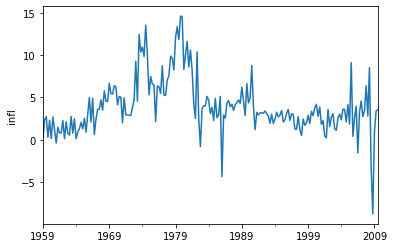

In [23]:
df['infl'].plot()
plt.ylabel("infl")

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


In [24]:
# unpacking
infl_cycle, infl_trend = sm.tsa.filters.hpfilter(df.infl)

infl_cycle

1959-03-31    -1.206811
1959-06-30     1.141499
1959-09-30     1.550564
1959-12-31    -0.909577
1960-03-31     1.140149
                ...    
2008-09-30    -5.064733
2008-12-31   -10.550048
2009-03-31    -0.681429
2009-06-30     1.883255
2009-09-30     2.206560
Name: infl, Length: 203, dtype: float64

In [25]:
type(infl_cycle)

pandas.core.series.Series

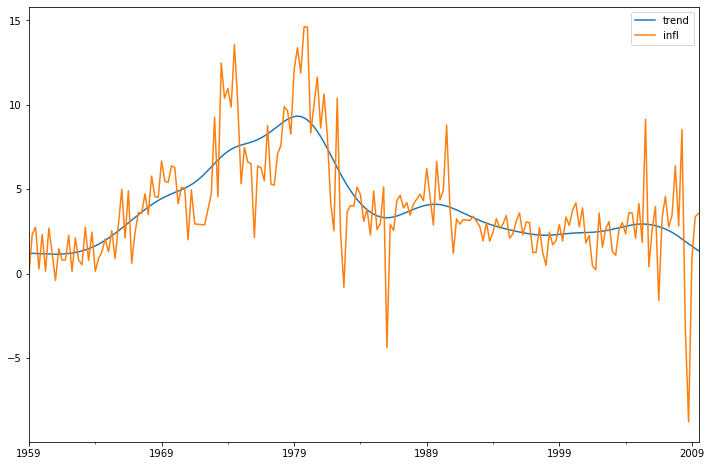

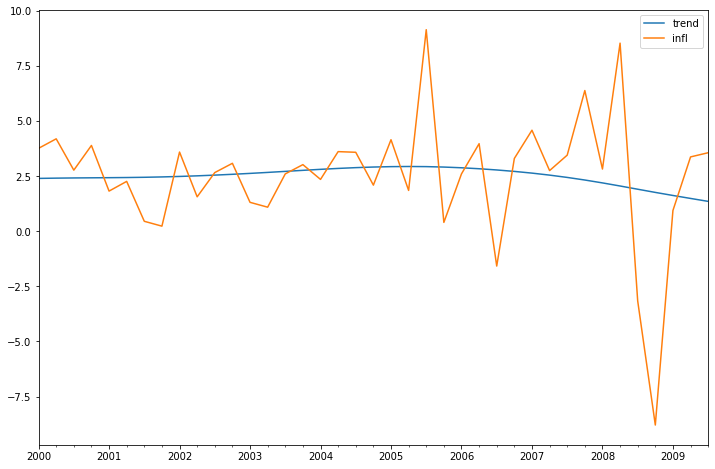

In [26]:
df["trend"] = infl_trend

df[['trend','infl']].plot(figsize = (12, 8))

df[['trend','infl']]["2000-03-31":].plot(figsize = (12, 8))